In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

In [72]:
book = pd.read_csv("/Users/page/data/book/DETAIL_INFO.csv")

In [73]:
book.head()

,NO,Year,CBS_NAME,CBS_Class,CBS_MY_Order,CBS_MY_Rate,CBS_XS_MY,CBS_DXPZ,CBS_XSCS,CBS_CRTAX,...,User_Area,User_Get_Price,FXS_Discount,FXS_BK_MY_Order,FXS_BK_MY_Rate,FXS_BK_MY,FXS_BK_DXPZ,FXS_BK_XSCS,FXS_BK_Average_Price,Unnamed: 27
0,1,2011,中信出版集团股份有限公司,中央及军队出版社,11,1.0934,90678033.8,2921,2357742,0.07,...,一线城市，个别省会城市,9.0,0.585,2,3.4196,15289978.1,1579,426206,35.87,NaN
1,2,2011,中信出版集团股份有限公司,中央及军队出版社,11,1.0934,90678033.8,2921,2357742,0.07,...,一线城市，个别省会城市,9.0,0.585,484,0.0000,36.0,1,2,18.00,NaN
2,3,2011,中信出版集团股份有限公司,中央及军队出版社,11,1.0934,90678033.8,2921,2357742,0.08,...,一线城市，个别省会城市,9.0,0.585,235,0.0099,15346.0,7,478,32.10,NaN
3,4,2011,中信出版集团股份有限公司,中央及军队出版社,11,1.0934,90678033.8,2921,2357742,0.07,...,一线城市，个别省会城市,9.0,0.585,3,3.1915,10890168.2,405,232732,46.79,NaN
4,5,2011,中信出版集团股份有限公司,中央及军队出版社,11,1.0934,90678033.8,2921,2357742,0.08,...,一线城市，个别省会城市,9.0,0.585,181,0.0240,59391.0,21,1022,58.11,NaN


In [74]:
book["CBS_Class"].value_counts()

中央及军队出版社      1819
高校出版社          546
城市与地方媒体出版社     381
地方文艺出版社        321
地方少儿出版社        312
地方科技出版社        194
地方古籍出版社        179
地方人民出版社        175
地方美术出版社        173
Name: CBS_Class, dtype: int64

In [75]:
book.count()

NO                      4100
Year                    4100
CBS_NAME                4100
CBS_Class               4100
CBS_MY_Order            4100
CBS_MY_Rate             4100
CBS_XS_MY               4100
CBS_DXPZ                4100
CBS_XSCS                4100
CBS_CRTAX               4100
Book_Class              4100
CBS_BK_Average_price    4100
CBS_BK_MY_Order         4100
CBS_BK_MY_Rate          4100
CBS_BK_XS_MY            4100
CBS_BK_DXPZ             4100
CBS_BK_XSCS             4100
FXS_Class               4100
User_Area               4100
User_Get_Price          4100
FXS_Discount            4100
FXS_BK_MY_Order         4100
FXS_BK_MY_Rate          4100
FXS_BK_MY               4100
FXS_BK_DXPZ             4100
FXS_BK_XSCS             4100
FXS_BK_Average_Price    4100
Unnamed: 27                0
dtype: int64

In [76]:
book.columns

Index(['NO', 'Year', 'CBS_NAME', 'CBS_Class', 'CBS_MY_Order', 'CBS_MY_Rate',
       'CBS_XS_MY', 'CBS_DXPZ', 'CBS_XSCS', 'CBS_CRTAX', 'Book_Class',
       'CBS_BK_Average_price', 'CBS_BK_MY_Order', 'CBS_BK_MY_Rate',
       'CBS_BK_XS_MY', 'CBS_BK_DXPZ', 'CBS_BK_XSCS', 'FXS_Class', 'User_Area',
       'User_Get_Price', 'FXS_Discount', 'FXS_BK_MY_Order', 'FXS_BK_MY_Rate',
       'FXS_BK_MY', 'FXS_BK_DXPZ', 'FXS_BK_XSCS', 'FXS_BK_Average_Price',
       'Unnamed: 27'],
      dtype='object')

In [77]:
x = book[['CBS_Class', 'CBS_MY_Order', 'CBS_MY_Rate',
       'CBS_XS_MY', 'CBS_DXPZ', 'CBS_XSCS', 'CBS_CRTAX', 'Book_Class',
       'CBS_BK_Average_price', 'CBS_BK_MY_Order', 'CBS_BK_MY_Rate',
       'CBS_BK_XS_MY', 'CBS_BK_DXPZ', 'FXS_Class', 'User_Area',
       'User_Get_Price', 'FXS_Discount', 'FXS_BK_MY_Order', 'FXS_BK_MY_Rate',
       'FXS_BK_MY', 'FXS_BK_DXPZ', 'FXS_BK_XSCS', 'FXS_BK_Average_Price']]

In [119]:
new_book = book[['CBS_Class', 'CBS_MY_Order', 'CBS_MY_Rate',
       'CBS_XS_MY', 'CBS_DXPZ', 'CBS_XSCS', 'CBS_CRTAX', 'Book_Class',
       'CBS_BK_Average_price', 'CBS_BK_MY_Order', 'CBS_BK_MY_Rate',
       'CBS_BK_XS_MY', 'CBS_BK_DXPZ','CBS_BK_XSCS', 'FXS_Class', 'User_Area',
       'User_Get_Price', 'FXS_Discount', 'FXS_BK_MY_Order', 'FXS_BK_MY_Rate',
       'FXS_BK_MY', 'FXS_BK_DXPZ', 'FXS_BK_XSCS', 'FXS_BK_Average_Price']]
new_book["User_Area"].replace(["三线城市为主，部分在二线", "一线城市，个别省会城市","一线和二线城市", "三线城市"],[1,2,3,4],inplace=True)
new_book["FXS_Class"].replace(["中等书店", "城市店","超大书城", "大书城","小型书店"],[1,2,3,4,5],inplace=True)
new_book["Book_Class"].replace(["社科", "少儿","文艺", "生活休闲","语言","教辅教材","科技","综合图书"],[1,2,3,4,5,6,7,8],inplace=True)
new_book["CBS_Class"].replace(["中央及军队出版社", "高校出版社","城市与地方媒体出版社", "地方文艺出版社","地方少儿出版社","地方科技出版社",
                        "地方古籍出版社","地方人民出版社","地方美术出版社"],[1,2,3,4,5,6,7,8,9],inplace=True)

/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [79]:
y = book[['CBS_BK_XSCS']]

In [121]:
new_book.to_csv("/Users/page/data/book/newbook.csv",header=True)

In [81]:
x.head()

,CBS_Class,CBS_MY_Order,CBS_MY_Rate,CBS_XS_MY,CBS_DXPZ,CBS_XSCS,CBS_CRTAX,Book_Class,CBS_BK_Average_price,CBS_BK_MY_Order,...,FXS_Class,User_Area,User_Get_Price,FXS_Discount,FXS_BK_MY_Order,FXS_BK_MY_Rate,FXS_BK_MY,FXS_BK_DXPZ,FXS_BK_XSCS,FXS_BK_Average_Price
0,中央及军队出版社,11,1.0934,90678033.8,2921,2357742,0.07,社科,34.83,3,...,超大书城,一线城市，个别省会城市,9.0,0.585,2,3.4196,15289978.1,1579,426206,35.87
1,中央及军队出版社,11,1.0934,90678033.8,2921,2357742,0.07,教辅教材,17.75,515,...,超大书城,一线城市，个别省会城市,9.0,0.585,484,0.0000,36.0,1,2,18.00
2,中央及军队出版社,11,1.0934,90678033.8,2921,2357742,0.08,语言,32.51,258,...,超大书城,一线城市，个别省会城市,9.0,0.585,235,0.0099,15346.0,7,478,32.10
3,中央及军队出版社,11,1.0934,90678033.8,2921,2357742,0.07,文艺,47.25,3,...,超大书城,一线城市，个别省会城市,9.0,0.585,3,3.1915,10890168.2,405,232732,46.79
4,中央及军队出版社,11,1.0934,90678033.8,2921,2357742,0.08,科技,60.70,191,...,超大书城,一线城市，个别省会城市,9.0,0.585,181,0.0240,59391.0,21,1022,58.11


In [82]:
y.head()

,CBS_BK_XSCS
0,1428330
1,16
2,1933
3,736560
4,3451


In [83]:
x["User_Area"].value_counts()

三线城市为主，部分在二线    1664
一线城市，个别省会城市      826
一线和二线城市          822
三线城市             788
Name: User_Area, dtype: int64

In [84]:
x["User_Area"].replace(["三线城市为主，部分在二线", "一线城市，个别省会城市","一线和二线城市", "三线城市"],[1,2,3,4],inplace=True)

/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [85]:
x["FXS_Class"].replace(["中等书店", "城市店","超大书城", "大书城","小型书店"],[1,2,3,4,5],inplace=True)

/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [86]:
x["Book_Class"].replace(["社科", "少儿","文艺", "生活休闲","语言","教辅教材","科技","综合图书"],[1,2,3,4,5,6,7,8],inplace=True)

/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


AttributeError: 'NoneType' object has no attribute 'shape'

In [88]:
x.shape

(4100, 23)

In [89]:
x["Book_Class"].value_counts()

3    575
2    575
1    575
4    559
5    556
6    555
7    526
8    179
Name: Book_Class, dtype: int64

In [90]:
x["CBS_Class"].value_counts()

中央及军队出版社      1819
高校出版社          546
城市与地方媒体出版社     381
地方文艺出版社        321
地方少儿出版社        312
地方科技出版社        194
地方古籍出版社        179
地方人民出版社        175
地方美术出版社        173
Name: CBS_Class, dtype: int64

In [91]:
x["CBS_Class"].replace(["中央及军队出版社", "高校出版社","城市与地方媒体出版社", "地方文艺出版社","地方少儿出版社","地方科技出版社",
                        "地方古籍出版社","地方人民出版社","地方美术出版社"],[1,2,3,4,5,6,7,8,9],inplace=True)

/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [113]:
x.head()

,CBS_Class,CBS_MY_Order,CBS_MY_Rate,CBS_XS_MY,CBS_DXPZ,CBS_XSCS,CBS_CRTAX,Book_Class,CBS_BK_Average_price,CBS_BK_MY_Order,...,FXS_Class,User_Area,User_Get_Price,FXS_Discount,FXS_BK_MY_Order,FXS_BK_MY_Rate,FXS_BK_MY,FXS_BK_DXPZ,FXS_BK_XSCS,FXS_BK_Average_Price
0,1,11,1.0934,90678033.8,2921,2357742,0.07,1,34.83,3,...,3,2,9.0,0.585,2,3.4196,15289978.1,1579,426206,35.87
1,1,11,1.0934,90678033.8,2921,2357742,0.07,6,17.75,515,...,3,2,9.0,0.585,484,0.0000,36.0,1,2,18.00
2,1,11,1.0934,90678033.8,2921,2357742,0.08,5,32.51,258,...,3,2,9.0,0.585,235,0.0099,15346.0,7,478,32.10
3,1,11,1.0934,90678033.8,2921,2357742,0.07,3,47.25,3,...,3,2,9.0,0.585,3,3.1915,10890168.2,405,232732,46.79
4,1,11,1.0934,90678033.8,2921,2357742,0.08,7,60.70,191,...,3,2,9.0,0.585,181,0.0240,59391.0,21,1022,58.11


In [112]:
x.columns

Index(['CBS_Class', 'CBS_MY_Order', 'CBS_MY_Rate', 'CBS_XS_MY', 'CBS_DXPZ',
       'CBS_XSCS', 'CBS_CRTAX', 'Book_Class', 'CBS_BK_Average_price',
       'CBS_BK_MY_Order', 'CBS_BK_MY_Rate', 'CBS_BK_XS_MY', 'CBS_BK_DXPZ',
       'FXS_Class', 'User_Area', 'User_Get_Price', 'FXS_Discount',
       'FXS_BK_MY_Order', 'FXS_BK_MY_Rate', 'FXS_BK_MY', 'FXS_BK_DXPZ',
       'FXS_BK_XSCS', 'FXS_BK_Average_Price'],
      dtype='object')

In [94]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [97]:
from IPython.display import Image

In [114]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=x,
                         class_names=y,  
                         filled=True, rounded=True,
                         special_characters=True)

KeyError: 11

In [107]:
x.head()

,CBS_Class,CBS_MY_Order,CBS_MY_Rate,CBS_XS_MY,CBS_DXPZ,CBS_XSCS,CBS_CRTAX,Book_Class,CBS_BK_Average_price,CBS_BK_MY_Order,...,FXS_Class,User_Area,User_Get_Price,FXS_Discount,FXS_BK_MY_Order,FXS_BK_MY_Rate,FXS_BK_MY,FXS_BK_DXPZ,FXS_BK_XSCS,FXS_BK_Average_Price
0,1,11,1.0934,90678033.8,2921,2357742,0.07,1,34.83,3,...,3,2,9.0,0.585,2,3.4196,15289978.1,1579,426206,35.87
1,1,11,1.0934,90678033.8,2921,2357742,0.07,6,17.75,515,...,3,2,9.0,0.585,484,0.0000,36.0,1,2,18.00
2,1,11,1.0934,90678033.8,2921,2357742,0.08,5,32.51,258,...,3,2,9.0,0.585,235,0.0099,15346.0,7,478,32.10
3,1,11,1.0934,90678033.8,2921,2357742,0.07,3,47.25,3,...,3,2,9.0,0.585,3,3.1915,10890168.2,405,232732,46.79
4,1,11,1.0934,90678033.8,2921,2357742,0.08,7,60.70,191,...,3,2,9.0,0.585,181,0.0240,59391.0,21,1022,58.11


In [111]:
clf.predict([[1,11,1.0934,90678033.8,2921, 2357742,0.07, 1, 34.83, 3, 1,1,1,1,1,1,1,1,1,1,1,1,1]])

ValueError: could not convert string to float: 'Book_Class'

In [110]:
clf.predict([[1,11,1.0934,90678033.8,2921, 2357742,0.07, 1, 34.83, 3, 1,1,1,1,1,1,1,1,1,1,1,1,1]])

array([2])

In [116]:
print(x.dtypes)

CBS_Class                 int64
CBS_MY_Order              int64
CBS_MY_Rate             float64
CBS_XS_MY               float64
CBS_DXPZ                  int64
CBS_XSCS                  int64
CBS_CRTAX               float64
Book_Class                int64
CBS_BK_Average_price    float64
CBS_BK_MY_Order           int64
CBS_BK_MY_Rate          float64
CBS_BK_XS_MY            float64
CBS_BK_DXPZ               int64
FXS_Class                 int64
User_Area                 int64
User_Get_Price          float64
FXS_Discount            float64
FXS_BK_MY_Order           int64
FXS_BK_MY_Rate          float64
FXS_BK_MY               float64
FXS_BK_DXPZ               int64
FXS_BK_XSCS               int64
FXS_BK_Average_Price    float64
dtype: object


In [117]:
print(book.dtypes)

NO                        int64
Year                      int64
CBS_NAME                 object
CBS_Class                object
CBS_MY_Order              int64
CBS_MY_Rate             float64
CBS_XS_MY               float64
CBS_DXPZ                  int64
CBS_XSCS                  int64
CBS_CRTAX               float64
Book_Class               object
CBS_BK_Average_price    float64
CBS_BK_MY_Order           int64
CBS_BK_MY_Rate          float64
CBS_BK_XS_MY            float64
CBS_BK_DXPZ               int64
CBS_BK_XSCS               int64
FXS_Class                object
User_Area                object
User_Get_Price          float64
FXS_Discount            float64
FXS_BK_MY_Order           int64
FXS_BK_MY_Rate          float64
FXS_BK_MY               float64
FXS_BK_DXPZ               int64
FXS_BK_XSCS               int64
FXS_BK_Average_Price    float64
Unnamed: 27             float64
dtype: object


In [122]:
xm = x.as_matrix()

In [123]:
type(xm)

numpy.ndarray

xm

In [125]:
ym = y.as_matrix()

In [140]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [141]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=x.columns.tolist(),
                         class_names=y.columns.tolist(),  
                         filled=True, rounded=True,
                         special_characters=True)

IndexError: list index out of range

In [137]:
x.columns.tolist()

['CBS_Class',
 'CBS_MY_Order',
 'CBS_MY_Rate',
 'CBS_XS_MY',
 'CBS_DXPZ',
 'CBS_XSCS',
 'CBS_CRTAX',
 'Book_Class',
 'CBS_BK_Average_price',
 'CBS_BK_MY_Order',
 'CBS_BK_MY_Rate',
 'CBS_BK_XS_MY',
 'CBS_BK_DXPZ',
 'FXS_Class',
 'User_Area',
 'User_Get_Price',
 'FXS_Discount',
 'FXS_BK_MY_Order',
 'FXS_BK_MY_Rate',
 'FXS_BK_MY',
 'FXS_BK_DXPZ',
 'FXS_BK_XSCS',
 'FXS_BK_Average_Price']

In [138]:
y.columns.tolist()

['CBS_BK_XSCS']

In [142]:
x.shape

(4100, 23)

In [143]:
y.shape

(4100, 1)

In [144]:
x.columns.shape

(23,)

In [145]:
y.columns.shape

(1,)

In [146]:
y.head()

,CBS_BK_XSCS
0,1428330
1,16
2,1933
3,736560
4,3451


In [148]:
y["CBS_BK_XSCS"].value_counts()

232        10
72          9
2           9
3406        9
404         9
1           8
51          7
10          6
924362      5
88774       5
1663693     5
66225       5
19116       5
8873        5
129702      5
98977       5
31382       5
100347      5
565885      5
31350       5
1886960     5
222025      5
1061463     5
589         5
488007      5
594495      5
45619       5
21035       5
1020531     5
291591      5
           ..
14          4
20          4
30          4
225         4
140         4
510         4
1379        4
44809       4
739         4
834         4
1386        4
195         4
222         4
176         4
197         4
476         4
168         4
1209        4
8           3
12          3
16          3
40          3
36          3
48          3
54          3
108         3
7           2
3           2
21          1
11          1
Name: CBS_BK_XSCS, dtype: int64

IndexError: single positional indexer is out-of-bounds

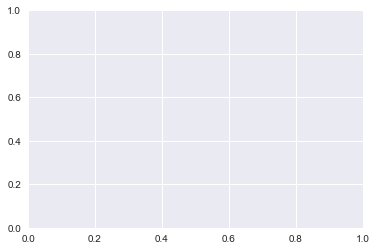

In [150]:
import seaborn as sns
sns.kdeplot(y, shade=True)

In [151]:
y["CBS_BK_XSCS"]

0       1428330
1            16
2          1933
3        736560
4          3451
5         97266
6         90184
7       1428330
8          1933
9        736560
10         3451
11        97266
12        90184
13      1428330
14           16
15         1933
16       736560
17         3451
18        97266
19        90184
20            2
21      1428330
22           16
23         1933
24       736560
25         3451
26        97266
27        90184
28            2
29      1428330
         ...   
4070      79572
4071          2
4072    6070987
4073     299984
4074      26793
4075     222520
4076       7381
4077      91485
4078      79572
4079    6070987
4080     299984
4081      26793
4082     222520
4083       7381
4084      91485
4085      79572
4086    6070987
4087     299984
4088      26793
4089     222520
4090       7381
4091      91485
4092      79572
4093    6070987
4094     299984
4095      26793
4096     222520
4097       7381
4098      91485
4099      79572
Name: CBS_BK_XSCS, dtype

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 3800.,   170.,    55.,     5.,    35.,    10.,    15.,     0.,
            0.,    10.]),
 array([  1.00000000e+00,   1.16430980e+06,   2.32861860e+06,
          3.49292740e+06,   4.65723620e+06,   5.82154500e+06,
          6.98585380e+06,   8.15016260e+06,   9.31447140e+06,
          1.04787802e+07,   1.16430890e+07]),
 <a list of 10 Patch objects>)

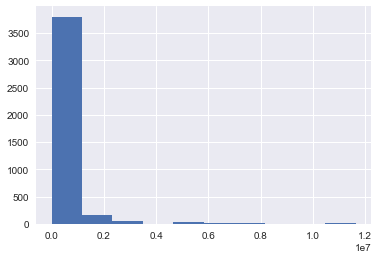

In [154]:
plt.hist(y["CBS_BK_XSCS"])

In [ ]:
type(x)